# Data Wrangling

### Table Of Contents 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#vizualize">Storing, Analyzing, and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. In this project, I will be using Python and its libraries, to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user **@dog_rates**, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In [1]:
#import packages 
import pandas as pd 
import numpy as np
import os
import requests 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
pd.set_option('display.max_colwidth', -1)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


<a id='gather'></a>
## Gather

### 1.The WeRateDogs Twitter archive  


In [3]:
#read WeRateDogs twitter data from a csv file  
twitter_archive_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 2. Image Predictions File 

In [4]:
#download Image predictions file programmatically using request library 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [5]:
#read Image Predictions file 
image_pred = pd.read_csv(url, delimiter='\t')
image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


### 3. Twitter API data 

In [6]:
#Unfortunately, I do not have access to Twitter API, so I will be using tweet json.text file instead, This the code used to access Twitter API

#import tweepy
#from tweepy import OAuthHandler
#import json
#from timeit import default_timer as timer 
#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True)
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)
#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
 #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
       # try:
        #    tweet = api.get_status(tweet_id, tweet_mode='extended')
        #    print("Success")
       #     json.dump(tweet._json, outfile)
       #     outfile.write('\n')
       # except tweepy.TweepError as e:
      #      print("Fail")
      #      fails_dict[tweet_id] = e
      #      pass
#end = timer()
#print(end - start)
#print(fails_dict)``
tweet = pd.read_json(r'tweet-json.txt', lines=True)
tweet_json= pd.DataFrame(tweet, columns = ['id', 'favorite_count','retweet_count'])
tweet_json.sample()

,id,favorite_count,retweet_count
2247,667861340749471744,253,86


<a id='assess'></a>
## Assess

### Visual Assessment 

In [7]:
twitter_archive_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [8]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [9]:
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Programmatic Assessment 

#### 1. The WeRateDogs Twitter archive 

In [10]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1070,740359016048689152,NaN,NaN,2016-06-08 01:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chase. He's in a predicament. 9/10 help is on the way buddy https://t.co/0HmBk5sSbW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740359016048689152/photo/1,9,10,Chase,None,None,None,None
1020,746757706116112384,NaN,NaN,2016-06-25 17:31:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af https://t.co/bROYbceZ1u,NaN,NaN,NaN,https://vine.co/v/5BYq6hmrEI3,11,10,Maddie,None,None,None,None
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubba. He's a Titted Peebles Aorta. Evolutionary masterpiece. Comfortable with his body. 8/10 great pupper https://t.co/aNkkl5nH3W,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042234327040/photo/1,8,10,Bubba,None,None,pupper,None
242,846153765933735936,NaN,NaN,2017-03-27 00:15:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vixen. He really likes bananas. Steals them when he thinks nobody's watching. 13/10 opportunistic af https://t.co/a0CkS5ExFR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/846153765933735936/photo/1,https://twitter.com/dog_rates/status/846153765933735936/photo/1",13,10,Vixen,None,None,None,None
975,750041628174217216,NaN,NaN,2016-07-04 19:00:33 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Beau. He's trying to keep his daddy from packing to leave for Annual Training. 13/10 and now I'm crying https://t.co/7JeDfQvzzI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750041628174217216/photo/1,13,10,Beau,None,None,None,None


In [12]:
twitter_archive_data.name.value_counts()

None         745
a            55 
Charlie      12 
Oliver       11 
Lucy         11 
             .. 
Kathmandu    1  
Stu          1  
Doobert      1  
Bert         1  
Glenn        1  
Name: name, Length: 957, dtype: int64

In [13]:
(twitter_archive_data.duplicated()).sum()

0

#### 2. Image Predictions File 

In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1178,737826014890496000,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,1,vizsla,0.990391,True,Rhodesian_ridgeback,0.005605,True,Chesapeake_Bay_retriever,0.002869,True
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/693108992730632192/pu/img/ncJQQZf3eroMSF12.jpg,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
1902,851861385021730816,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False
782,690005060500217858,https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg,1,Samoyed,0.270287,True,Great_Pyrenees,0.114027,True,teddy,0.072475,False
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True
282,671134062904504320,https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg,1,Shih-Tzu,0.180380,True,golden_retriever,0.180194,True,Labrador_retriever,0.173656,True
736,687102708889812993,https://pbs.twimg.com/media/CYkURJjW8AEamoI.jpg,1,fiddler_crab,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False
2039,884925521741709313,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,0.259916,True,American_Staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True
1061,715200624753819648,https://pbs.twimg.com/media/CeznK6IWEAEFUPq.jpg,1,Chihuahua,0.956787,True,beagle,0.008383,True,Labrador_retriever,0.008344,True


#### 3. Twitter API data

In [16]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
(tweet_json.duplicated()).sum()

0

In [18]:
tweet_json.shape[0]

2354

### Quality 
---
**Quality:** issues with content. Low quality data is also known as dirty data.

--- 

#### The WeRateDogs `twitter_archive_data`  table 
- incorrect values in rating_numerator column with decimal rating scores 
- timestamp is captured as a string object not datetime
- incorrect dog names that starts with lower case letters
- None values in dogs name 
- tweet_id is captured as an int not object string  
- archive data contains retweets along with original tweets 
- retweeted_status_id	retweeted_status_user_id , retweeted_status_timestamp, columns are not needed for the anlaysis 

#### Image Predictions File  `image_pred`  table 
- inconsistent capitalization in p1,p2,p3 column, some are written in title case and lowercase
- missing data,  Image Predictions File table has 2075 tweets information 
- p1, p2, p3 columns names are not clear  

#### Twitter API  `tweet_json` table 
-  missing data, Twitter API table has 2354 tweets information 



### Tidiness
---
**Tidiness:** issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.



---

- `twitter_archive_data` , `image_pred` , `tweet_json` tables describe one tweet

#### The WeRateDogs `twitter_archive_data`  table 

- four variables (doggo, floofer, pupper, puppo) in one column dog_stage


#### Twitter API  `tweet_json` table  
- id columns name needs to be tweet_id to match with `twitter_archive_data` and `image_pred` table 

<a id='clean'></a>
## Clean

In [19]:
#make copies of data 
twitter_archive_clean = twitter_archive_data.copy() 
image_pred_clean = image_pred.copy() 
tweet_json_clean = tweet_json.copy()  

#### Define
 `twitter_archive_data` **incorrect values in rating_numerator column with decimal rating scores**

> Cleaning rating_numerator column to extract decimal ratings from tweets text and adjust the rating column value  

#### Code

Because ratings have decimal values I will convert rating_numerator column from int to float type and adjust the rating values accroding to tweets

In [20]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float) 


In [21]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/anaconda3/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [22]:
twitter_archive_clean.loc[45,'rating_numerator'] = 13.5
twitter_archive_clean.loc[340,'rating_numerator'] = 9.75
twitter_archive_clean.loc[695,'rating_numerator'] = 9.75
twitter_archive_clean.loc[763,'rating_numerator'] = 11.27
twitter_archive_clean.loc[1689,'rating_numerator'] = 9.5
twitter_archive_clean.loc[1712,'rating_numerator'] = 11.26

#### Test 

Testing rating_numerator data type 

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Testing rating_numerator adjusted values 

In [24]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/anaconda3/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


`twitter_archive_clean` **timestamp is captured as a string object not datetime** 
#### Define
Convert timestamp column into datetime using `to_datetime` method in pandas

#### Code

In [25]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

`twitter_archive_clean`  **incorrect dog names that starts with lower case letters such as** [ by,quite,a,not, an ..etc ]
#### Define
`twitter_archive_clean` drop column with lower case names using `istitle()` method in pandas

#### Code 

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['name'].str.istitle()!= False]

#### Test 

In [28]:
twitter_archive_clean.name.str.istitle().value_counts()

True    2241
Name: name, dtype: int64

`twitter_archive_clean`  **None values in dogs name**
#### Define
Drop rows that have the value "None" as a dog name, using `twitter_archive_clean['name']!= 'None'`

#### Code 

In [29]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['name']!= 'None']

#### Test

In [30]:
(twitter_archive_clean.name == 'None').sum()

0

In [31]:
twitter_archive_clean.shape

(1496, 17)

`twitter_archive_clean`  **tweet_id is captured as an int not object string**  
#### Define 
Convert tweet_id into a string object because tweet_id column will not be used for manipulation or calculation

#### Code

In [32]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(int)

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 2325
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1496 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1496 non-null   datetime64[ns, UTC]
 4   source                      1496 non-null   object             
 5   text                        1496 non-null   object             
 6   retweeted_status_id         111 non-null    float64            
 7   retweeted_status_user_id    111 non-null    float64            
 8   retweeted_status_timestamp  111 non-null    object             
 9   expanded_urls               1496 non-null   object             
 10  rating_numerator            1496 non-null   float64         

`twitter_archive_clean` **archive data contains retweets along with original tweets**
#### Define
Removing retweets from twitter_archive_clean table using `.match()` to match `RT @dog_rates` pattren in text column

#### Code

In [34]:
twitter_archive_clean.text.str.match('RT @').value_counts()

False    1385
True     111 
Name: text, dtype: int64

In [35]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.text.str.match('RT @')!= True]

#### Test 

In [36]:
(twitter_archive_clean.text.str.match('RT @')).sum()

0

`twitter_archive_clean` **retweeted_status_id retweeted_status_user_id , retweeted_status_timestamp, columns are not needed for the anlaysis**
#### Define
Drop retweeted_status_id retweeted_status_user_id , retweeted_status_timestamp using `.drop()` method in pandas 

#### Code

In [37]:
#columns before .drop()
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [38]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True) 

#### Test

In [39]:
#after .drop() 
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [40]:
twitter_archive_clean.shape

(1385, 14)

`twitter_archive_clean`  **four variables (doggo, floofer, pupper, puppo) in one column dog_stage**
#### Define
Create dog_stage column and fill in its values from the pupper, puppo ,floofer and doggo columns 


#### Code

In [41]:
#fill in none values with nan 
twitter_archive_clean = twitter_archive_clean.replace('None', np.nan) 

In [42]:
#create dog_stage column and assign doggo, floofer, pupper and puppo values
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo','floofer','pupper','puppo']].fillna('').sum(1).replace('', np.nan)

In [43]:
twitter_archive_clean.dog_stage.value_counts()

pupper         121
doggo          38 
puppo          16 
floofer        5  
doggopupper    4  
Name: dog_stage, dtype: int64

In [44]:
 twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace('doggopupper', 'doggo,pupper')

In [45]:
 twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace=True)

#### Test

In [46]:
twitter_archive_clean.dog_stage.value_counts()

pupper          121
doggo           38 
puppo           16 
floofer         5  
doggo,pupper    4  
Name: dog_stage, dtype: int64

In [47]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [48]:
twitter_archive_clean.shape

(1385, 11)

`image_pred_clean` **inconsistent capitalization in p1,p2,p3 column values, some are written in title case and lowercase**
#### Define
`image_pred_clean` convert values in p1 , p2 , p3 column into Title Case letter using `title()` method 

#### Code 

In [49]:
image_pred_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1112,724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,0.581835,True,collie,0.344588,True,Shetland_sheepdog,0.043584,True
373,672988786805112832,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,1,Lakeland_terrier,0.836632,True,West_Highland_white_terrier,0.073900,True,wire-haired_fox_terrier,0.038160,True
218,670073503555706880,https://pbs.twimg.com/media/CUyUSuWXIAAZKYF.jpg,1,malamute,0.601886,True,Siberian_husky,0.340106,True,Eskimo_dog,0.050041,True


In [50]:
image_pred_clean.p1 = image_pred_clean.p1.str.title()
image_pred_clean.p2 = image_pred_clean.p2.str.title()
image_pred_clean.p3 = image_pred_clean.p3.str.title()

#### Test

In [51]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


`image_pred` **p1, p2, p3 columns names are not clear**

#### Define 

Rename p1, p2, p3 columns to  prediction_1 ,  prediction_2 ,  prediction_3 using `rename()` 


#### Code

In [52]:
image_pred_clean.rename(columns={'p1':'pred_1','p2':'pred_2','p3':'pred_3'}, inplace=True)

#### Test

In [53]:
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'pred_1', 'p1_conf', 'p1_dog',
       'pred_2', 'p2_conf', 'p2_dog', 'pred_3', 'p3_conf', 'p3_dog'],
      dtype='object')

`tweet_json` **id columns name needs to be tweet_id to match with twitter_archive_data and image_pred table**
#### Define 
Rename id columns to tweet_id using `rename()`

#### Code

In [54]:
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [55]:
tweet_json_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

`image_pred` **missing data, Image Predictions File table has 2075 tweets information** 
#### Define 

Create a new data frame and merge `image_pred` with `twitter_archive_clean`

In [56]:
twitter_archive_master = pd.merge(twitter_archive_clean,image_pred_clean,
                            on=['tweet_id'], how='left')

In [57]:
twitter_archive_master.shape

(1385, 22)

In [58]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num',
       'pred_1', 'p1_conf', 'p1_dog', 'pred_2', 'p2_conf', 'p2_dog', 'pred_3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [59]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,pred_1,p1_conf,p1_dog,pred_2,p2_conf,p2_dog,pred_3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,...,1.0,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,...,2.0,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


In [60]:
tweet_json_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

`tweet_json_clean` missing data, Twitter API table has 2354 tweets information 

### Define
Merge tweet_json_clean with twitter_archive_master

#### Code

In [61]:
twitter_archive_master = pd.merge(twitter_archive_master,tweet_json_clean, on=['tweet_id'], how='left')

#### Test

In [62]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,pred_2,p2_conf,p2_dog,pred_3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,...,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,...,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,666691418707132416,NaN,NaN,2015-11-17 18:56:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8.0,10,Christoper,...,0.975401,True,Beagle,0.008687,True,Bloodhound,0.005394,True,196,51
1381,666644823164719104,NaN,NaN,2015-11-17 15:51:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jimothy. He is a Botwanian Gouda. Can write (impressive). Very erect tail. Still looking for hoco date. 9/10 https://t.co/LEkZjZxESQ,https://twitter.com/dog_rates/status/666644823164719104/photo/1,9.0,10,Jimothy,...,0.044333,True,Pembroke,0.043209,True,West_Highland_White_Terrier,0.038906,True,238,88
1382,666454714377183233,NaN,NaN,2015-11-17 03:16:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'll name the dogs from now on. This is Kreggory. He does parkour. 10/10 https://t.co/uPqPeXAcua,https://twitter.com/dog_rates/status/666454714377183233/photo/1,10.0,10,Kreggory,...,0.278954,True,Labrador_Retriever,0.237612,True,Great_Pyrenees,0.171106,True,545,223
1383,666447344410484738,NaN,NaN,2015-11-17 02:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPh

In [63]:
#store cleaned data to csv
twitter_archive_master.to_csv(r'twitter_archive_master.csv', index = False)

<a id='store'></a>
## Storing, Analyzing, and Visualizing Data

In [64]:
twitter_data = pd.read_csv('twitter_archive_master.csv')

### Evaluating our models performance

> How many times our models **first prediction** is correct?**

In [65]:
twitter_data.p1_dog.value_counts()

True     1040
False    304 
Name: p1_dog, dtype: int64

>How many times our models **second prediction** is correct?**

In [66]:
twitter_data.p2_dog.value_counts()

True     1055
False    289 
Name: p2_dog, dtype: int64

> How many times our models **third prediction** is correct?  

In [67]:
twitter_data.p3_dog.value_counts()

True     1017
False    327 
Name: p3_dog, dtype: int64

> ### Most common words used in @dog_rates twitter account tweets 

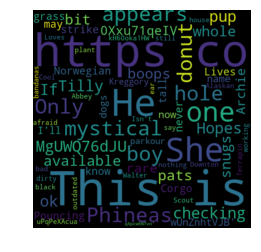

In [68]:
# Create the wordcloud object
text = twitter_data['text'].values 
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


The most common word used in @dog_rates tweets is "This is" 

Text(0.5,1,'Most Common Dog breed in @dog_rates Tweets')

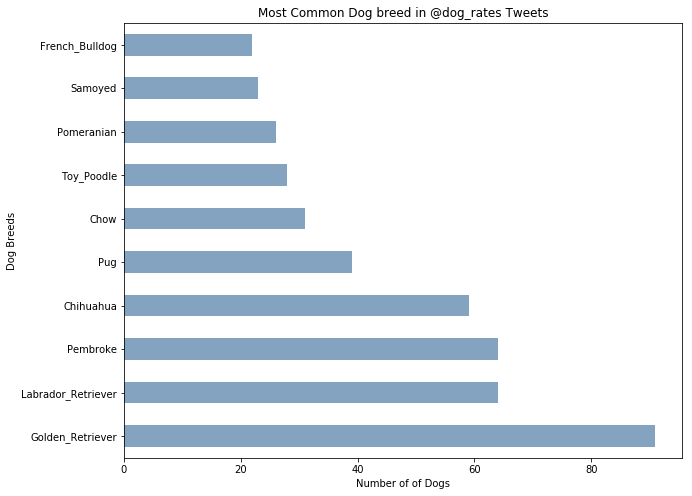

In [69]:
dog_breeds = (twitter_data[twitter_data['p1_dog']==True]).pred_1

result = dog_breeds.value_counts()[:10]

result.plot(kind='barh',figsize=(10,8),color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("Number of of Dogs")
plt.ylabel("Dog Breeds")
plt.title("Most Common Dog breed in @dog_rates Tweets")

Golden Retriever is the most common dog breed in @dog_rates retweets

> **Dog Stage @dog_rates tweets**

In [70]:


#[:10]

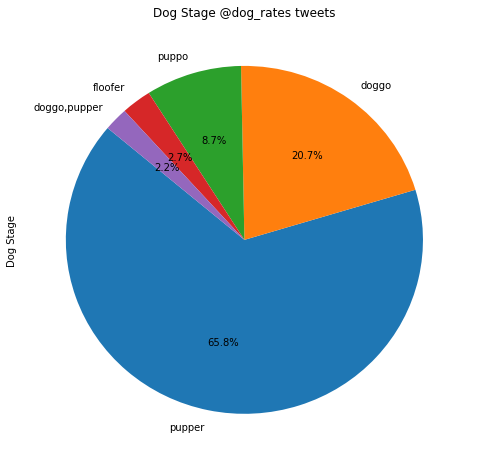

In [71]:
pie_data = twitter_data.dog_stage.value_counts()[:5]
pie_data.plot.pie(autopct='%1.1f%%', startangle=140,figsize=(8,8),title="Dog Stage @dog_rates tweets", label="Dog Stage")

The most common dog stage in @dog_rate tweet is "pupper" by 65.8% of overall tweets

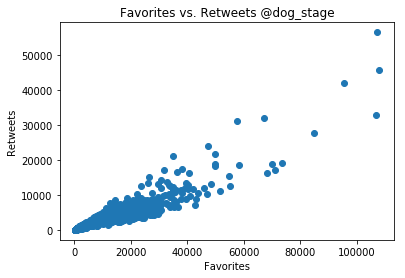

In [72]:
plt.scatter(twitter_data.favorite_count,twitter_data.retweet_count)
plt.title("Favorites vs. Retweets @dog_stage")
plt.xlabel("Favorites")
plt.ylabel("Retweets")
plt.show()

There is a positive corrleation between favorites count and retweet count

### Resources 


- https://python-graph-gallery.com/wordcloud/  
- https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe 
